# Predicting Default Credit Card Customers

## About Project Presenter

- Yağız Levent Güme 
- gume22@itu.edu.tr 
- 528221051

In [1]:
#Essential libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from ydata_profiling import ProfileReport
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

##Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

#Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

import sklearn
sklearn.set_config(transform_output="pandas")

## Data Set Introduction

- Give some technical information or a brief story about the data set you used in this project which will motivate the reader.
- Introduce your data set and variables in detail here (for example, you may have numerical, nominal, ordinal features along with possible missing values etc). 
- Please do not forget to give the reference of the place where you obtained the data set from.

# <a id="1">Introduction</a>  


## Dataset

Dataset that is used in this study Default of credit card clients Dataset is taken from UC Irvine (UCI) Machine Learning Repository. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005**. 

## Content

There are 25 variables:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)



In [2]:
df = pd.read_csv('datasets/UCI_Credit_Card.csv',index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Data Types and Non-null Counts of each Column in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [4]:
# The summary of each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [5]:
# A better view of the column info and distributions
#prof = ProfileReport(df,
#                    minimal=False,
#                    orange_mode=True)
#prof.to_notebook_iframe()

## Description of the Problem

- Tell us about the possible questions you are interested in this data set. 
  - You may want to build a regression model to predict a continuous variable based on a set of features and try to find a good model for this data set by fitting several different models and comparing the performance of the models on this data set.
  - You may want to build a classfier to predict a binary/multi-class variable based on a set of features and try to find a good model for this data set by fitting several different classifiers and comparing the performance of the models on this data set.
  - You may have high-dimensional features (too many features) and want to reduce the dimension of features prior to model building etc.

In this problem, I will try to predict the probability of a customer to default in his/her credit card payment next month based on demographical information, payments and bills in previous months. This is one of the common problems in risk managements in banking and finance sector. 

The dependent variable which is **default.payment.next.month** is a binary target (therefore the problem can be named as binary classification problem); 
* 1 if customer pays his/her bill in next month,
* 0 if he/she can't.	

## Data Exploration
- Tell us about the descriptive approaches you have done to explore your data set.
   - Some basic descriptive statistics
   - Some visualizations that will open a door/insight for your questions.
- Please, whenever you present a result/visualization here, interpret it. If you are not planning to interpret it, do not include it here either.

In [6]:
#in order to readability, i want to name my target variable as 'target' and call it by that in the rest of the notebook
target = 'default.payment.next.month' 

### Missing Data Exploration

In [7]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,LIMIT_BAL,SEX,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,...,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,default.payment.next.month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As can be seen from the table above, there is no missing data in dataset. Therefore, additional steps for missing value imputation is not necessary.

### Data Exploration

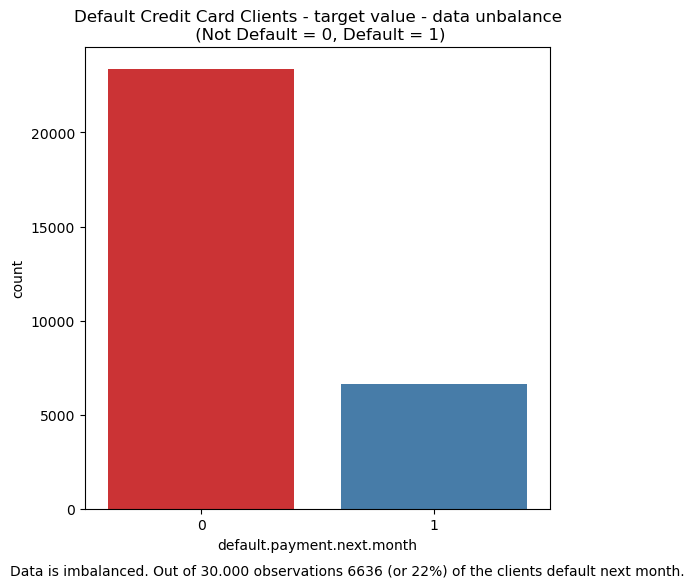

In [8]:
# Distribution of Target Variable
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Not Default = 0, Default = 1)')

sns.countplot(x = target, 
              data=df,
             palette='Set1')

locs, labels = plt.xticks()
plt.figtext(0, 0, "Data is imbalanced. Out of 30.000 observations 6636 (or 22%) of the clients default next month.")
plt.show()

**Data is imbalanced. Although the imbalance of our dataset is not that high to necessitate under/over sampling or any other balancing, It is important to keep in mind the imbalanced nature of our dataset for future computations.**

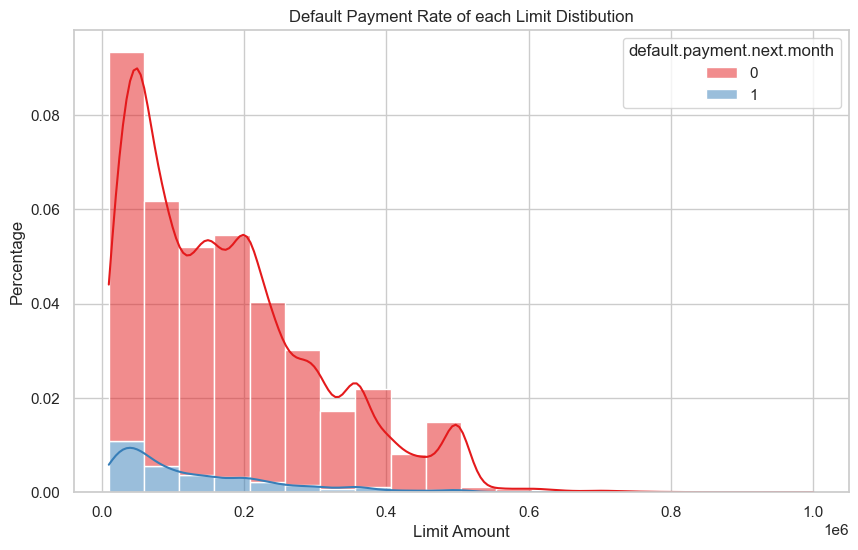

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar chart
sns.histplot(data=df, x='LIMIT_BAL', 
             hue=target, 
             multiple='stack', 
             stat='frequency',
             bins=20,
             kde=True,
             palette='Set1')

# Add labels and title
plt.xlabel("Limit Amount")
plt.ylabel("Percentage")
plt.title("Default Payment Rate of each Limit Distibution")

# Display the chart
plt.show()

**As can be seen from the above plot, the customers with low limit amounts is more likely to have a default month. We can check this better with boxplots. Mean and median of the default credit cards is less than the non default credit cards.**

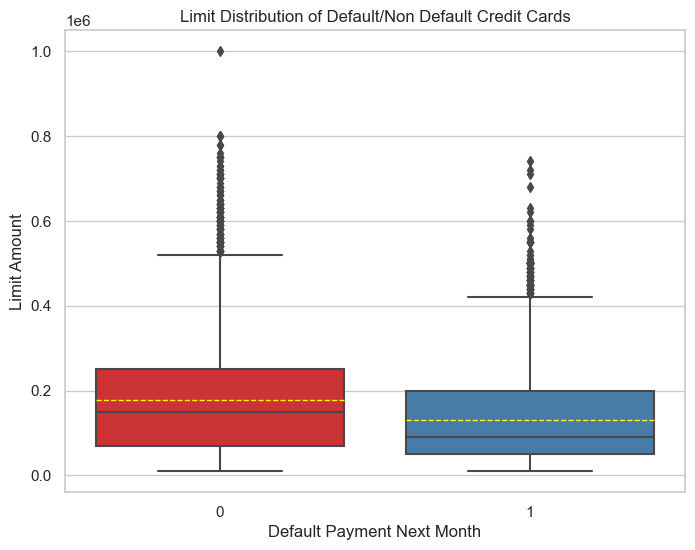

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(data=df,
            x=target,
            y='LIMIT_BAL',
            showmeans=True, 
            meanline=True, 
            meanprops={'color':'yellow', 'linewidth': 1},
           palette='Set1')
# Add labels and title
plt.xlabel("Default Payment Next Month")
plt.ylabel("Limit Amount")
plt.title("Limit Distribution of Default/Non Default Credit Cards")

# Display the chart
plt.show()

#### Exploration of Demographical Features

In [11]:
# Function for exploring two categorical features.
def cat_col_dist(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['Percentage'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [12]:
# The distribution of default payment between different genders
cat_col_dist('SEX', target)

default.payment.next.month,0,1,Percentage
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


In [13]:
# The distribution of default payment according to education level of customer
cat_col_dist('EDUCATION', target)

default.payment.next.month,0,1,Percentage
EDUCATION,,,
0,14.0,NaN,NaN
1,8549.0,2036.0,0.192348
2,10700.0,3330.0,0.237349
3,3680.0,1237.0,0.251576
4,116.0,7.0,0.056911
5,262.0,18.0,0.064286
6,43.0,8.0,0.156863


In [14]:
# The distribution of default payment according to martial status of customer
cat_col_dist('MARRIAGE', target)

default.payment.next.month,0,1,Percentage
MARRIAGE,,,
0,49,5,0.092593
1,10453,3206,0.234717
2,12623,3341,0.209283
3,239,84,0.260062


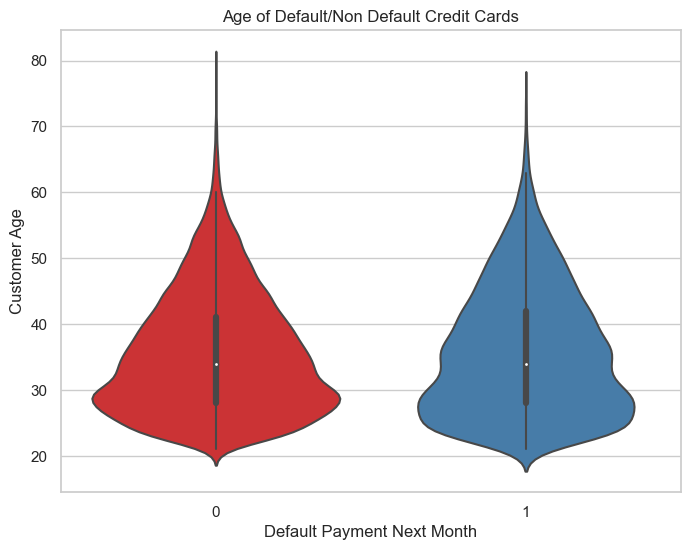

In [15]:
# Age- Default payment distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.violinplot(data=df,
            x=target,
            y='AGE',
           palette='Set1')
# Add labels and title
plt.xlabel("Default Payment Next Month")
plt.ylabel("Customer Age")
plt.title("Age of Default/Non Default Credit Cards")

# Display the chart
plt.show()

**In this tables, I try to analyze if our target variable is changing with the categorical demographic information of customers.**
* Between male customers 24% default next month. On the other hand, 20% of female customers default. These percentages are really close to each other and therefore, the sex of the customer alone is not a good seperator in our case.
* However, It seems like percentage of default change dramatically between education levels. Althouth there is no clear info about some of the categories (4:others, 5:unknown, 6:unknown), these unclear categories have lower default rate than the known categories like 1:graduate school, 2:university, 3:high school.
* I try to see if there is any difference in martial status of customers according to our target variable. For the main categories (1:married and 2:single), we can say that they are not really seperable. We also have 3:others and 0:unknown in this column too. 
* Lastly, I ckeck the overall age distribution of customers change according to target variable. From the violinplots, It seems like both default and non-default customers have similar age distributions.

Although some of these features seems important to our problem, it is always important to keep in mind that usage of some of these demographical features are still controversial topic. The use of features such as sex, race, or other protected attributes in machine learning problems can raise concerns related to fairness, bias, and ethical considerations.

Given these concerns, it is important to carefully consider whether the inclusion of certain attributes is necessary and whether their use aligns with ethical guidelines and legal requirements. It may be necessary to implement fairness-aware techniques, such as fairness metrics, bias mitigation strategies, or alternative feature representations, to mitigate biases and ensure fair treatment in machine learning models.

In cases where the use of sensitive attributes is unavoidable, it is crucial to approach the problem with transparency, accountability, and responsible practices, taking into account the potential impact on individuals and societal implications.

<i>Note: In data cleaning step we can treat these unknown categories.</i>

#### Exploration of Payment History

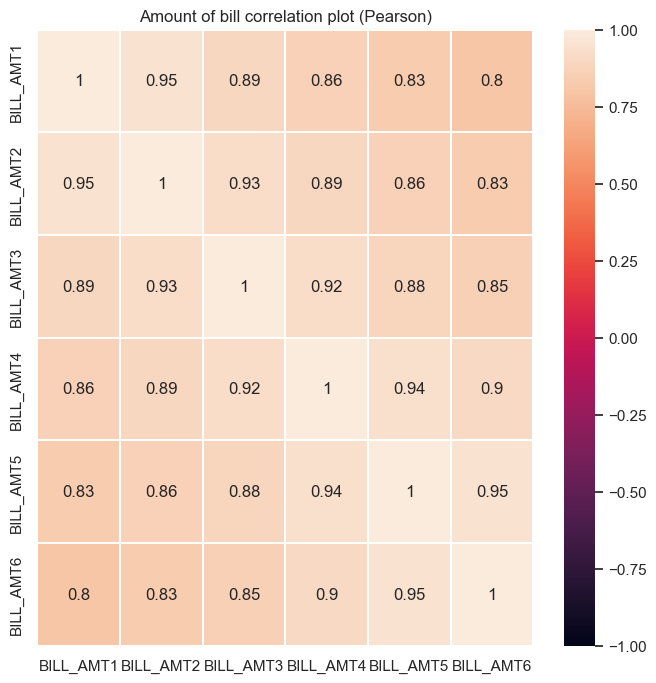

In [16]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill correlation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            linewidths=.1,
            annot=True,
            vmin=-1, 
            vmax=1)
plt.show()

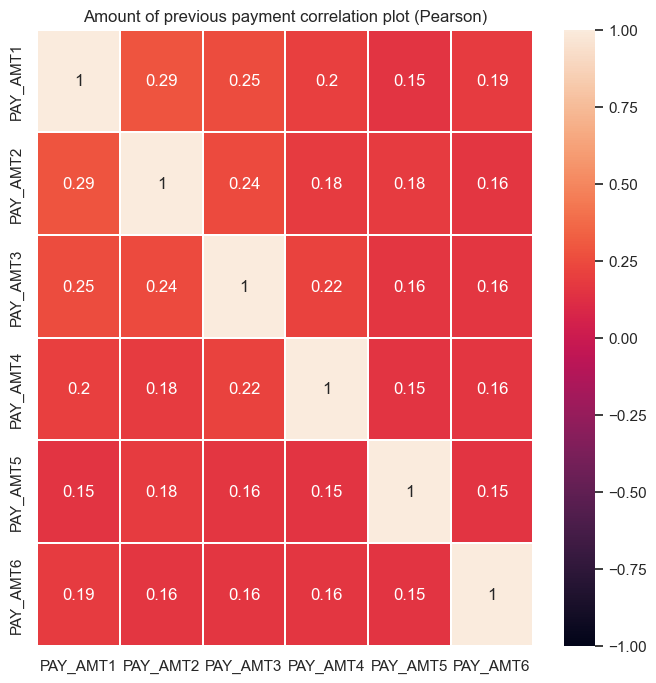

In [17]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment correlation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            linewidths=.1,
            annot=True,
            vmin=-1, 
            vmax=1)
plt.show()

**From the correlation plots above it seems like while bill amounts are highly correlated each month, suprisingly, payment amounts are not correlated.** 

**Also as expected, for both payment and bill amounts, Correlation is decreasing with distance between months. For instance, pay_amount1 (which is the paid amount in september) is less correlated with the pay_amount5 (which is the paid amount in may).**

**Payment Status features are maybe the most important features in our dataset, since it directly indicates the payment performance of the customer in previous months. In general customers that had hard time paying their bills in the previous months, more likely to default in the upcomming months. We can see this effect clearly if we compare the payment perfromances in any consecutive months.**

In [18]:
# Dataset doesnt have PAY_1 but this might be because of a typo (only this columns start from 0)
# Payment status comparison of september and agust (based on the counts)
# For reminder -1 : paid duly - 1,2,3...8 : paid with 1,2,3...8 months delay 
cross_table = pd.crosstab(df.PAY_2, df.PAY_0)
styled_table = cross_table.style.background_gradient(cmap='Blues',axis=1) #For colored representation of the table
styled_table

PAY_0,-2,-1,0,1,2,3,4,5,6,7,8
PAY_2,,,,,,,,,,,
-2,2561,0,0,1221,0,0,0,0,0,0,0
-1,193,4641,478,612,126,0,0,0,0,0,0
0,0,603,14259,3,865,0,0,0,0,0,0
1,0,0,0,28,0,0,0,0,0,0,0
2,5,387,0,1672,1591,272,0,0,0,0,0
3,0,47,0,109,71,41,58,0,0,0,0
4,0,5,0,32,14,8,15,25,0,0,0
5,0,3,0,7,0,1,3,0,11,0,0
6,0,0,0,2,0,0,0,1,0,9,0


In [19]:
# Payment status comparison of september and agust (based on the ratios)
# For reminder -1 : paid duly - 1,2,3...8 : paid with 1,2,3...8 months delay 
cross_table = pd.crosstab(df.PAY_2, df.PAY_0, normalize='index')
styled_table = cross_table.style.background_gradient(cmap='Blues',axis=1) #For colored representation of the table
formatted_data = styled_table.format("{:.2f}") #In order to take two digit after the comma
formatted_data

PAY_0,-2,-1,0,1,2,3,4,5,6,7,8
PAY_2,,,,,,,,,,,
-2,0.68,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00
-1,0.03,0.77,0.08,0.10,0.02,0.00,0.00,0.00,0.00,0.00,0.00
0,0.00,0.04,0.91,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.10,0.00,0.43,0.41,0.07,0.00,0.00,0.00,0.00,0.00
3,0.00,0.14,0.00,0.33,0.22,0.13,0.18,0.00,0.00,0.00,0.00
4,0.00,0.05,0.00,0.32,0.14,0.08,0.15,0.25,0.00,0.00,0.00
5,0.00,0.12,0.00,0.28,0.00,0.04,0.12,0.00,0.44,0.00,0.00
6,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.08,0.00,0.75,0.00


**From the cross table above we can see that most of the customers tend to remain their payment status from previous months. We can see that 77% of the customers that paid their bill duly in agust also paid their bill on time in september.**

<i>Note: The metadata of our dataset doesn't have a explanation for '-2' and '0' values in this features.</i>

## Methodologies

- Tell us about data pre-processing approaches you have done (if you have done any).
- Tells us about the methodologies you have done to find answer to your research problems defined above.

For pre-processing and feature engineering there are several steps that i have to apply. Since my dataset doesn't include any null values, I don't need an null value imputation step.

#### Data Cleaning

In some of the observations, some of the features takes values that they shouldn't take. For categorical columns, some of the categories are not specified in metadata. On the other hand for some of the numerical fetures, there are values that are not really possible (i.e. negative bill amounts).

#### Feature Engineering
* I have to eliminate some of the columns since similar columns have really high correlation score.
* I have to eliminate some of the features because of ethical reasons.
* I can create new features from the features that I have.

#### Pre-processing
I am planning to apply several different algorithms (logistic regression, decision tree, random forest). Therefore for each of these algorithms, I have to create different pre-processing pipelines. For instance, scaling, outline treatment etc. is needed for logistic regression but tree based algorithms still can perform well without these pre-process steps.

Besides these steps, there are several steps like encoding of categorical columns etc. that I have to apply regardless of my algorithm selection. All my pipelines will include these steps.

### Data Cleaning

As seen previously, some categories are mislabeled or undocumented. Before proceeding, it is time to fix it.

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

In [20]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

According to metadata, the PAY_n variables indicate the number of months of delay and indicates "pay duly" with -1. There is no real explanation for values like -2 and 0. It seems like they are mislabeled and can be considered as "pay duly". In order to preserve linearity, i will label 0, -1 and 2 (pay duly) as 0. 

Also there is no 0th Pay_Amt or Bill_Amt but there is in pay (pay_0). This might be a typo. Therefore I will change its name to PAY_1 like the other ones.

In [21]:
#Change PAY_0 to PAY_1
df.rename({'PAY_0':'PAY_1'},axis=1,inplace=True)

In [22]:
# Pay duly
for i in range(1,7):
    df.loc[(df['PAY_'+str(i)] == -2) | 
           (df['PAY_'+str(i)] == -1) | 
           (df['PAY_'+str(i)] == 0),
           'PAY_'+str(i)] = 0

There are some customers which their bill amounts are negative in some months. This doesn't make any sense to me, therefore I will replace their value with 0. 

In [23]:
for i in range(1,7):
    df.loc[(df['BILL_AMT'+str(i)]<0),'BILL_AMT'+str(i)] = 0 

In [24]:
# Elimination of Gender and Marriage features
df.drop(['SEX','MARRIAGE'], axis=1, inplace=True)

### Feature Engineering

There are several features that I want to create:
* limit_usage_rate = how much of the limit is used in that month,
* delayed_payment_flag = probably some of the customers never had delayed payment. This customers can be flagged as 0 and the others can be 1. 
* payment_performance = Total of PAY cols to see average weighted payment performance of the customer
* weighted_payment_performance = customers payment history can be weighted (last months have larger weight)



**Important note:** In general it is advised to divide dataset as train and test before feature engineering. However in this case, I am just creating the new features and not applying any feature selection strategies yet. Also there is no leakage in the way of creation of my new features (this type of leakage mostly happens when we are dealing with the time series data). Therefore, I will divide my dataset after the feature creation step.

In [25]:
for i in range(1,7):
    df['LIMIT_USAGE_RATE_'+str(i)] = df['BILL_AMT'+str(i)]/df['LIMIT_BAL']

In [26]:
df['DELAYED_PAYMENT_FLAG'] = (df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] != 0).any(axis=1).astype(int)

In [27]:
# The distribution of the target according to the newly created delayed payment flag 
pd.crosstab(df[target],df['DELAYED_PAYMENT_FLAG'], normalize='index')

DELAYED_PAYMENT_FLAG,0,1
default.payment.next.month,,
0,0.753167,0.246833
1,0.351718,0.648282


In [28]:
df['PAYMENT_PERFORMANCE'] = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis=1)

In [29]:
#Average Payment Performance for our Target Classes
pd.DataFrame(df.groupby(target).mean()['PAYMENT_PERFORMANCE'])

,PAYMENT_PERFORMANCE
default.payment.next.month,
0,0.964390
1,4.234328


In [30]:
# I will assign weights to each months as 6 (highest importance) to the last month (PAY_1) 
#and 1 (lowest importance to the first month (PAY_6))
weights = [6, 5, 4, 3, 2, 1]
df['WEIGHTED_PAYMENT_PERFORMANCE'] = (df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] * weights).sum(axis=1)

In [31]:
#Average Weighted Payment Performance for our Target Classes
pd.DataFrame(df.groupby(target).mean()['WEIGHTED_PAYMENT_PERFORMANCE'])

,WEIGHTED_PAYMENT_PERFORMANCE
default.payment.next.month,
0,3.637134
1,16.140597


#### Train Test Split

In [32]:
# Before all of pre-processing, I have to split my dataset as train and test 
# Since our dataset is slightly imbalanced, 
#I used stratified spliting to preserve the distribution of the dependent variable
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference([target])],
                                                    df[target],
                                                   test_size = 0.2,
                                                   stratify = df[target],
                                                   random_state=42)

### Metric Selection

Since we are dealing with a binary classification problem. There are several evaluation metrics that we can use to evaluate the performance of our models. The most known ones are ; accuracy, precision, recall, F1 score, area under the ROC curve. From this metrics I prefer to use F1 score as my final metric.
The advantages of F1 Score over the other metrics are;

* Since we have a slightly imbalanced data. Using a metric like accuracy wouldn't be a good fit. The F1 score is particularly useful when dealing with imbalanced classes, since it considers both precision and recall, making it more robust in imbalanced scenarios.

* The F1 score is the harmonic mean of precision and recall. This makes it a suitable metric in the cases where we want to focus on finding the right balance between precision and recall, as it penalizes extreme values for either metric. This is especially relevant when you want to avoid models that have high precision but low recall, or vice versa. In our case, only focusing precision or recall can yield very high scores in the selected metric but very very poor performance in the other one, since there is a trade off between this metrics.

## Logistic Regression

In [33]:
# Define the numerical columns
num_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
            'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
            'PAY_AMT5', 'PAY_AMT6', 'LIMIT_USAGE_RATE_1', 'LIMIT_USAGE_RATE_2',
            'LIMIT_USAGE_RATE_3', 'LIMIT_USAGE_RATE_4', 'LIMIT_USAGE_RATE_5',
            'LIMIT_USAGE_RATE_6', 'PAYMENT_PERFORMANCE', 'WEIGHTED_PAYMENT_PERFORMANCE']

# Define the ordinal columns
ordinal_cols = ['EDUCATION', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DELAYED_PAYMENT_FLAG']

# Create the column transformer
logreg_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('ord', OrdinalEncoder(), ordinal_cols)
    ])

# Create the pipeline
#linreg_pp_pipe = Pipeline(steps=[('preprocessor', linreg_preprocessor)])

In [34]:
# Preprocess my X_train dataset by using pipeline I created above (fit_transform)
logreg_transformed_X_train = logreg_preprocessor.fit_transform(X_train)
#Preprocess my X_test dataset by using pipeline (only transform)
logreg_transformed_X_test = logreg_preprocessor.transform(X_test)

### Variance Inflation Factor (VIF) for Feature Selection

We can check multicollinarity with VIF which is the ratio of the variance of estimating some parameter in a model that includes multiple other parameters by the variance of a model constructed using only one term.

VIFs larger than 10 imply serious problems with multicollinearity.

VIFs which are between 5-10 imply moderate problems with multicollinearity.

The rule of thumb in general is taking the cols with VIF value less than 5.

In [35]:
# sklearn pipeline returned all column names with starting num__ and ord__.
new_num_cols = ['num__' + string for string in num_cols]

new_ord_cols = ['ord__' + string for string in ordinal_cols]

In [36]:
# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = new_num_cols
vif["VIF"] = [variance_inflation_factor(logreg_transformed_X_train[new_num_cols].values, i) for i in range(len(new_num_cols))]

In [37]:
vif.sort_values(by='VIF')

,Feature,VIF
1,num__AGE,1.026436
13,num__PAY_AMT6,1.168569
11,num__PAY_AMT4,1.584284
12,num__PAY_AMT5,1.658436
8,num__PAY_AMT1,1.660924
10,num__PAY_AMT3,1.812965
9,num__PAY_AMT2,2.122533
0,num__LIMIT_BAL,2.276486
19,num__LIMIT_USAGE_RATE_6,11.950783
14,num__LIMIT_USAGE_RATE_1,17.407972


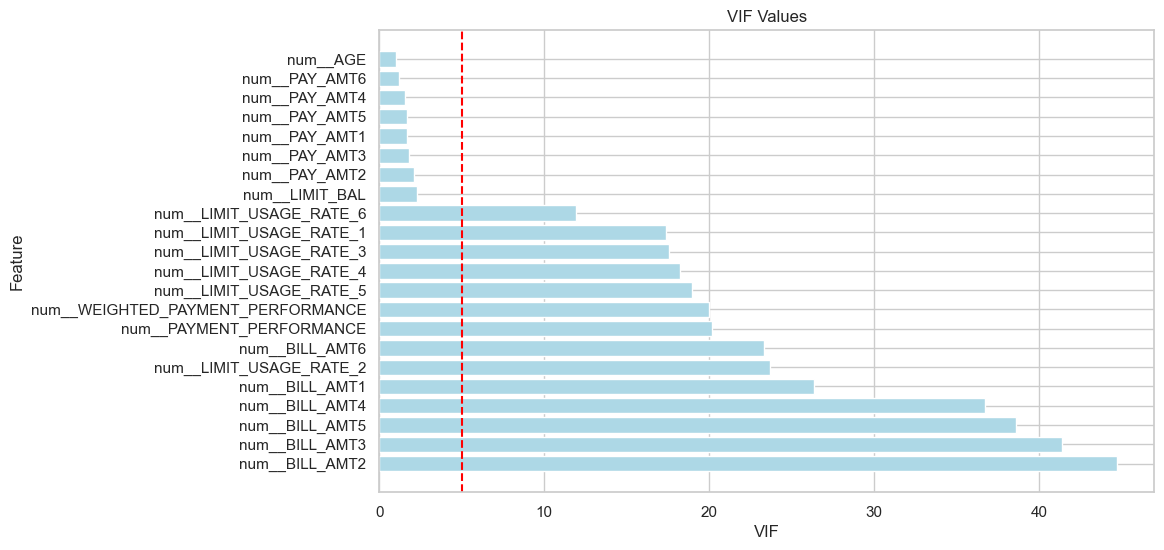

In [38]:
vif = vif.sort_values(by='VIF', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(vif['Feature'], vif['VIF'], color='lightblue')
plt.axvline(x=5, color='red', linestyle='--')

# Add labels and title
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.title('VIF Values')

# Display the plot
plt.show()

In [39]:
#Acording to the VIF scores selected columns are;
vif_selected_features = vif[vif.VIF<5].Feature.to_list()

In [40]:
# The results of Logistic Regression with the only selected columns by VIF and categorical cols:
lr = LogisticRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(lr, 
                         X = logreg_transformed_X_train[vif_selected_features+new_ord_cols],
                         y = y_train,
                         cv=5, 
                         scoring='f1')

In [41]:
#Fit the model to whole trainset
lr.fit(X = logreg_transformed_X_train[vif_selected_features+new_ord_cols],
       y = y_train)

LogisticRegression()

In [42]:
# Training Results
train_preds = lr.predict(logreg_transformed_X_train[vif_selected_features+new_ord_cols])
train_f1_score = f1_score(y_train,train_preds)

In [43]:
# Test the results in test set
test_preds = lr.predict(logreg_transformed_X_test[vif_selected_features+new_ord_cols])
test_f1_score = f1_score(y_test,test_preds)

In [44]:
print('The average F1 Score of logistic regression with columns selected with VIF are: {:.3f} +/- {:.3f}'
      .format(scores.mean(),scores.std()))

print('The F1 score in our train set is :',round(train_f1_score,3))
print('The F1 score in our test set is :',round(test_f1_score,3))

The average F1 Score of logistic regression with columns selected with VIF are: 0.457 +/- 0.011
The F1 score in our train set is : 0.457
The F1 score in our test set is : 0.451


In [45]:
# Although we are mainly concerning with the F1 score, 
#it is always advised to check the other metrics as well
print('Classification Report for Logistic Regression on Train Data')
print(classification_report(y_train,train_preds))
print('**********************************************************')
print('Classification Report for Logistic Regression on Test Data')
print(classification_report(y_test,test_preds))

Classification Report for Logistic Regression on Train Data
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18691
           1       0.68      0.34      0.46      5309

    accuracy                           0.82     24000
   macro avg       0.76      0.65      0.67     24000
weighted avg       0.80      0.82      0.80     24000

**********************************************************
Classification Report for Logistic Regression on Test Data
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



## Decision Tree

Since tree based algorithms doesn't neeed that much of a preprocessing, I will only encode my ordinal columns and apply the algorithm

In [46]:
# Create the column transformer for decision tree that only includes ordinal encoding
tree_preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_cols)
    ],remainder='passthrough')

In [47]:
# Preprocess my X_train dataset by using pipeline I created above (fit_transform)
tree_transformed_X_train = tree_preprocessor.fit_transform(X_train)
#Preprocess my X_test dataset by using pipeline (only transform)
tree_transformed_X_test = tree_preprocessor.transform(X_test)

### Hyper-parameter Tuning for Decision Tree

In [48]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters and their corresponding values to search
hyperparameters = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth': np.arange(2, 6), # I am using fairly small tree in depth to visualization
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(2, 20)
}

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(dt_classifier, 
                                   hyperparameters, 
                                   cv=5, 
                                   scoring='f1', 
                                   n_iter=50, 
                                   random_state=42)


random_search.fit(tree_transformed_X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([2, 3, 4, 5]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=42, scoring='f1')

In [49]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'min_samples_split': 2, 'min_samples_leaf': 16, 'max_depth': 4, 'criterion': 'entropy'}
Best Score:  0.47571302794010817


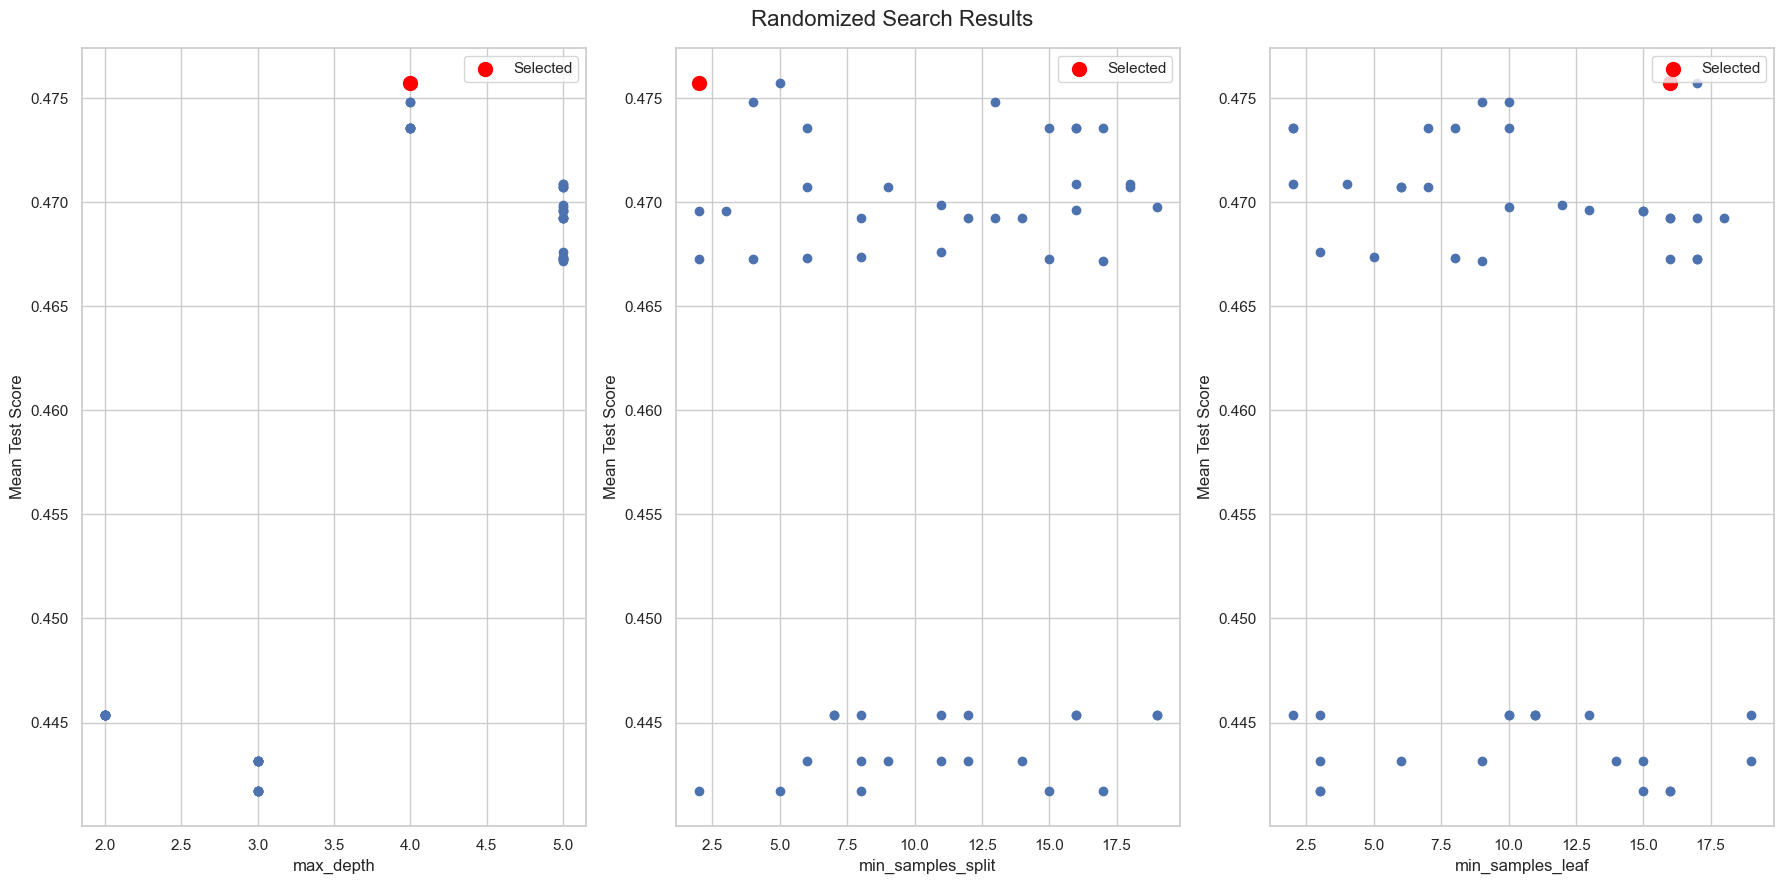

In [50]:
param_names = ['max_depth', 'min_samples_split', 'min_samples_leaf']
#param_ranges = list(hyperparameters.values())
scores = random_search.cv_results_['mean_test_score']

# Create subplots for each hyperparameter
fig, axes = plt.subplots(1, 3, figsize=(18, 9))

# Plot the results for each hyperparameter
for i, ax in enumerate(axes):
    param_name = param_names[i]
    param_values = random_search.cv_results_['param_' + param_name]
    best_param = random_search.best_params_[param_name]

    ax.scatter(param_values, scores)
    ax.scatter(best_param, random_search.best_score_, color='red', label='Selected', s=100)
    ax.set_xlabel(param_name)
    ax.set_ylabel('Mean Test Score')
    ax.grid(True)
    ax.legend()

plt.suptitle('Randomized Search Results', fontsize=16)
plt.tight_layout()
plt.show()

In [51]:
# Now we can train the decision tree with the selected hyper paramters on the whole training dataset
dt_classifier = DecisionTreeClassifier(**random_search.best_params_)

#Fit the model to whole trainset
dt_classifier.fit(X = tree_transformed_X_train,
                  y = y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=16)

#### Decision Tree Feature Importances

In [52]:
# Get the feature importances from the trained model
importances = dt_classifier.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = [tree_transformed_X_train.columns.to_list()[i] for i in indices]
sorted_importances = importances[indices]

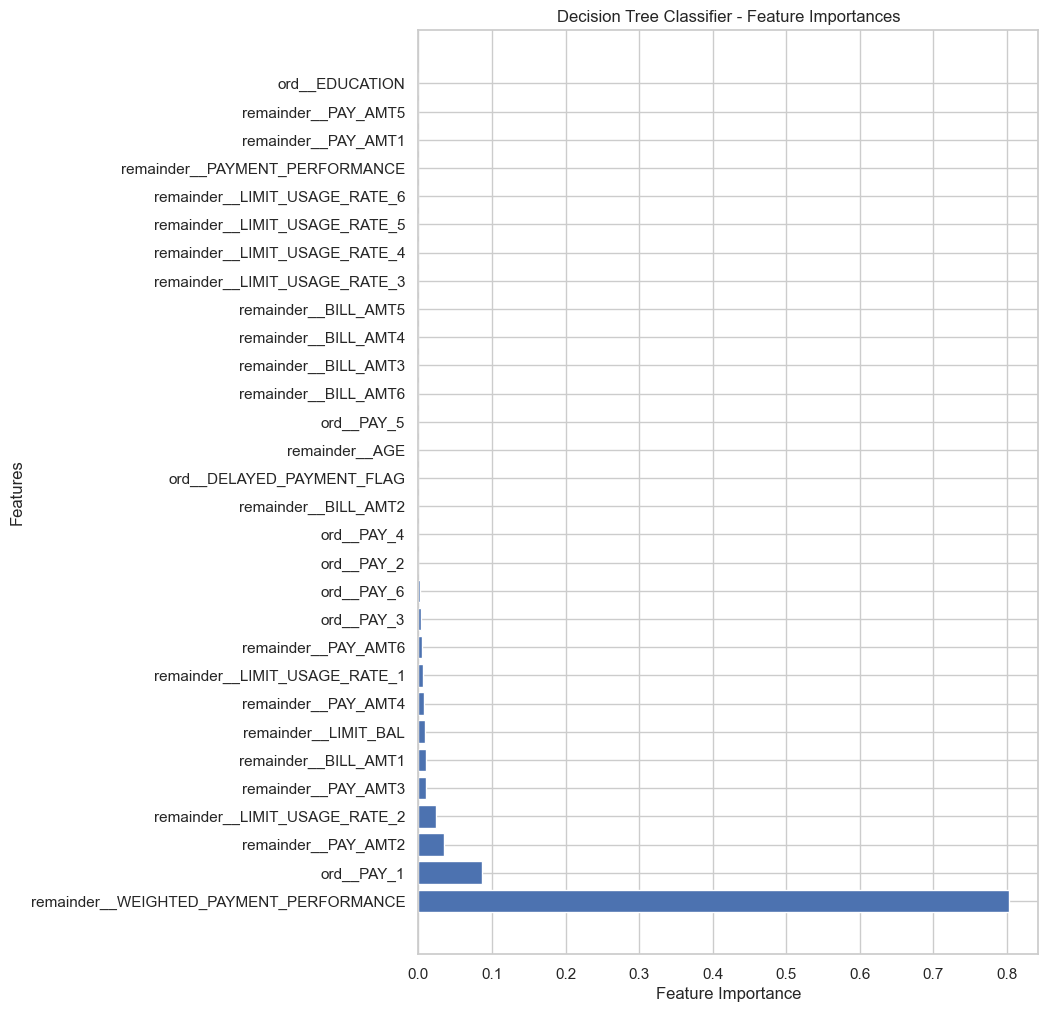

In [53]:
# Create a horizontal bar plot of feature importances
feature_names = tree_transformed_X_train.columns.to_list()

plt.figure(figsize=(8, 12))
plt.barh(range(len(feature_names)), sorted_importances, align='center')
plt.yticks(range(len(feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Classifier - Feature Importances')
plt.grid(True)

plt.show()

As I expected columns about the payment history of the customer the most important columns when we are tring to decide wheather the customer will default in this month or not. 

It is clearly can be seen that one of the the column I created (WEIGHTED_PAYMENT_PERFORMANCE) is by far the most important feature according to our decision tree.

Also it is seen that, most of the features are not used in the tree. In order to see that we can plot the decision tree.

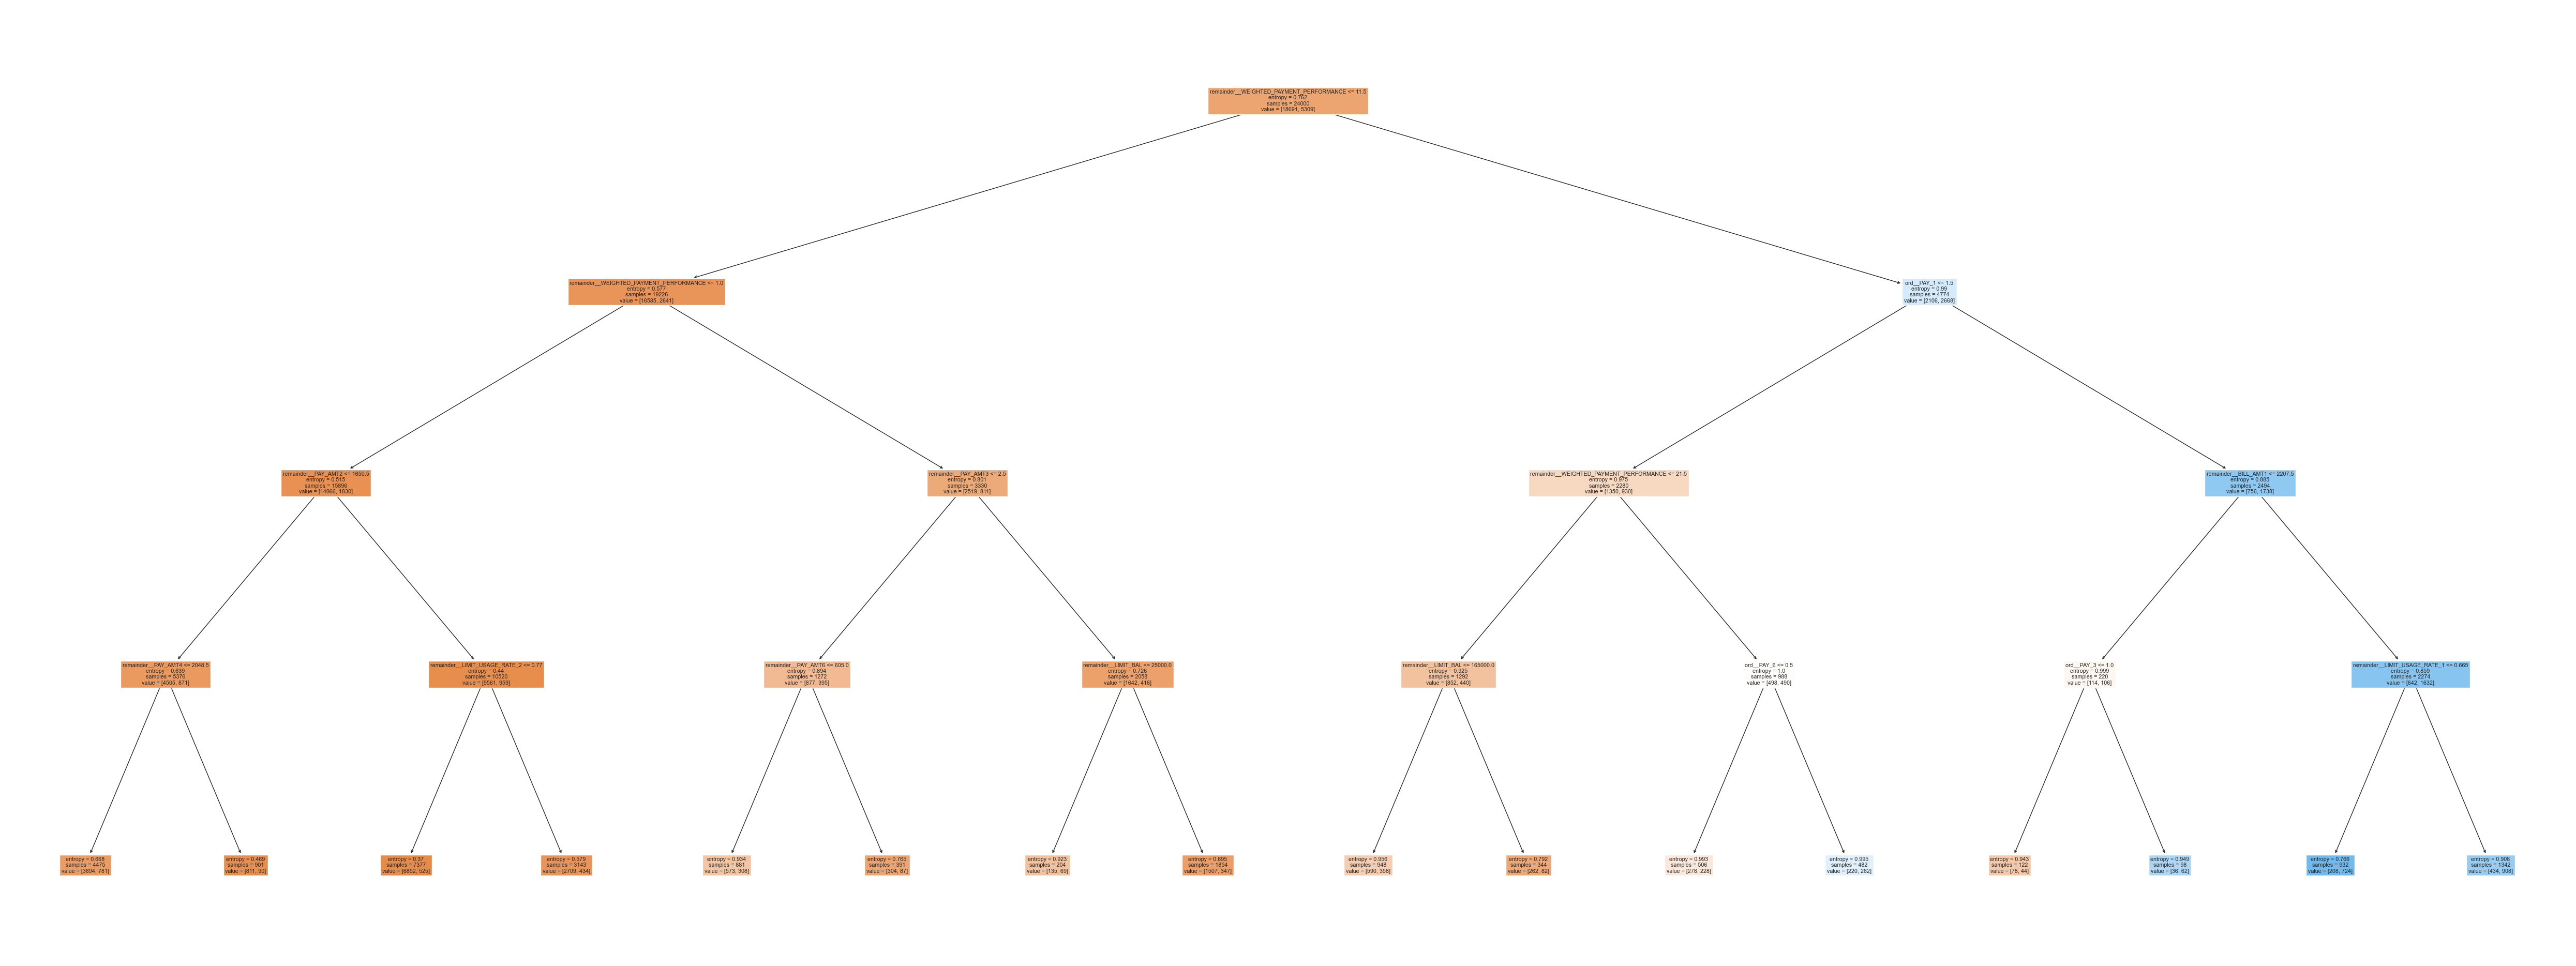

In [54]:
# Plot the decision tree
# We can zoom in to tree by double clicking 
plt.figure(figsize=(64, 24))
plot_tree(dt_classifier, filled=True, feature_names=feature_names)
# Save the decision tree as a PNG file
plt.savefig('img/decision_tree.png')

In [55]:
# Training Results
train_preds = dt_classifier.predict(tree_transformed_X_train)
train_f1_score = f1_score(y_train,train_preds)

In [56]:
# Test the results in test set
test_preds = dt_classifier.predict(tree_transformed_X_test)
test_f1_score = f1_score(y_test,test_preds)

In [57]:
# Decision Tree Results
print('The average F1 Score of Decision Tree with best hyper-parameters is: {:.3f}'
      .format(random_search.best_score_))

print('The F1 score in our train set is :',round(train_f1_score,3))
print('The F1 score in our test set is :',round(test_f1_score,3))

The average F1 Score of Decision Tree with best hyper-parameters is: 0.476
The F1 score in our train set is : 0.479
The F1 score in our test set is : 0.471


In [58]:
# Although we are mainly concerning with the F1 score, 
#it is always advised to check the other metrics as well
print('Classification Report for Decision Tree on Train Data')
print(classification_report(y_train,train_preds))
print('**********************************************************')
print('Classification Report for Decision Tree on Test Data')
print(classification_report(y_test,test_preds))

Classification Report for Decision Tree on Train Data
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18691
           1       0.69      0.37      0.48      5309

    accuracy                           0.82     24000
   macro avg       0.76      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000

**********************************************************
Classification Report for Decision Tree on Test Data
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## Random Forest

In [59]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their corresponding values to search
# In order to speed up the process, I am keeping hyper parameter space smaller.
hyperparameters = {
    'n_estimators': np.arange(10, 50, 10),
    'max_depth': np.arange(1, 5),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(2, 20)
}

# Perform random search cross-validation
random_search = RandomizedSearchCV(rf_classifier, 
                                   hyperparameters, 
                                   cv=5, 
                                   scoring='f1', 
                                   n_iter=20, #to speed up the process I am keeping number of iterations small 
                                   random_state=42)

# Fitting the random search to our train set
random_search.fit(tree_transformed_X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': array([1, 2, 3, 4]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([10, 20, 30, 40])},
                   random_state=42, scoring='f1')

In [60]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'n_estimators': 40, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_depth': 4}
Best Score:  0.47924628446963047


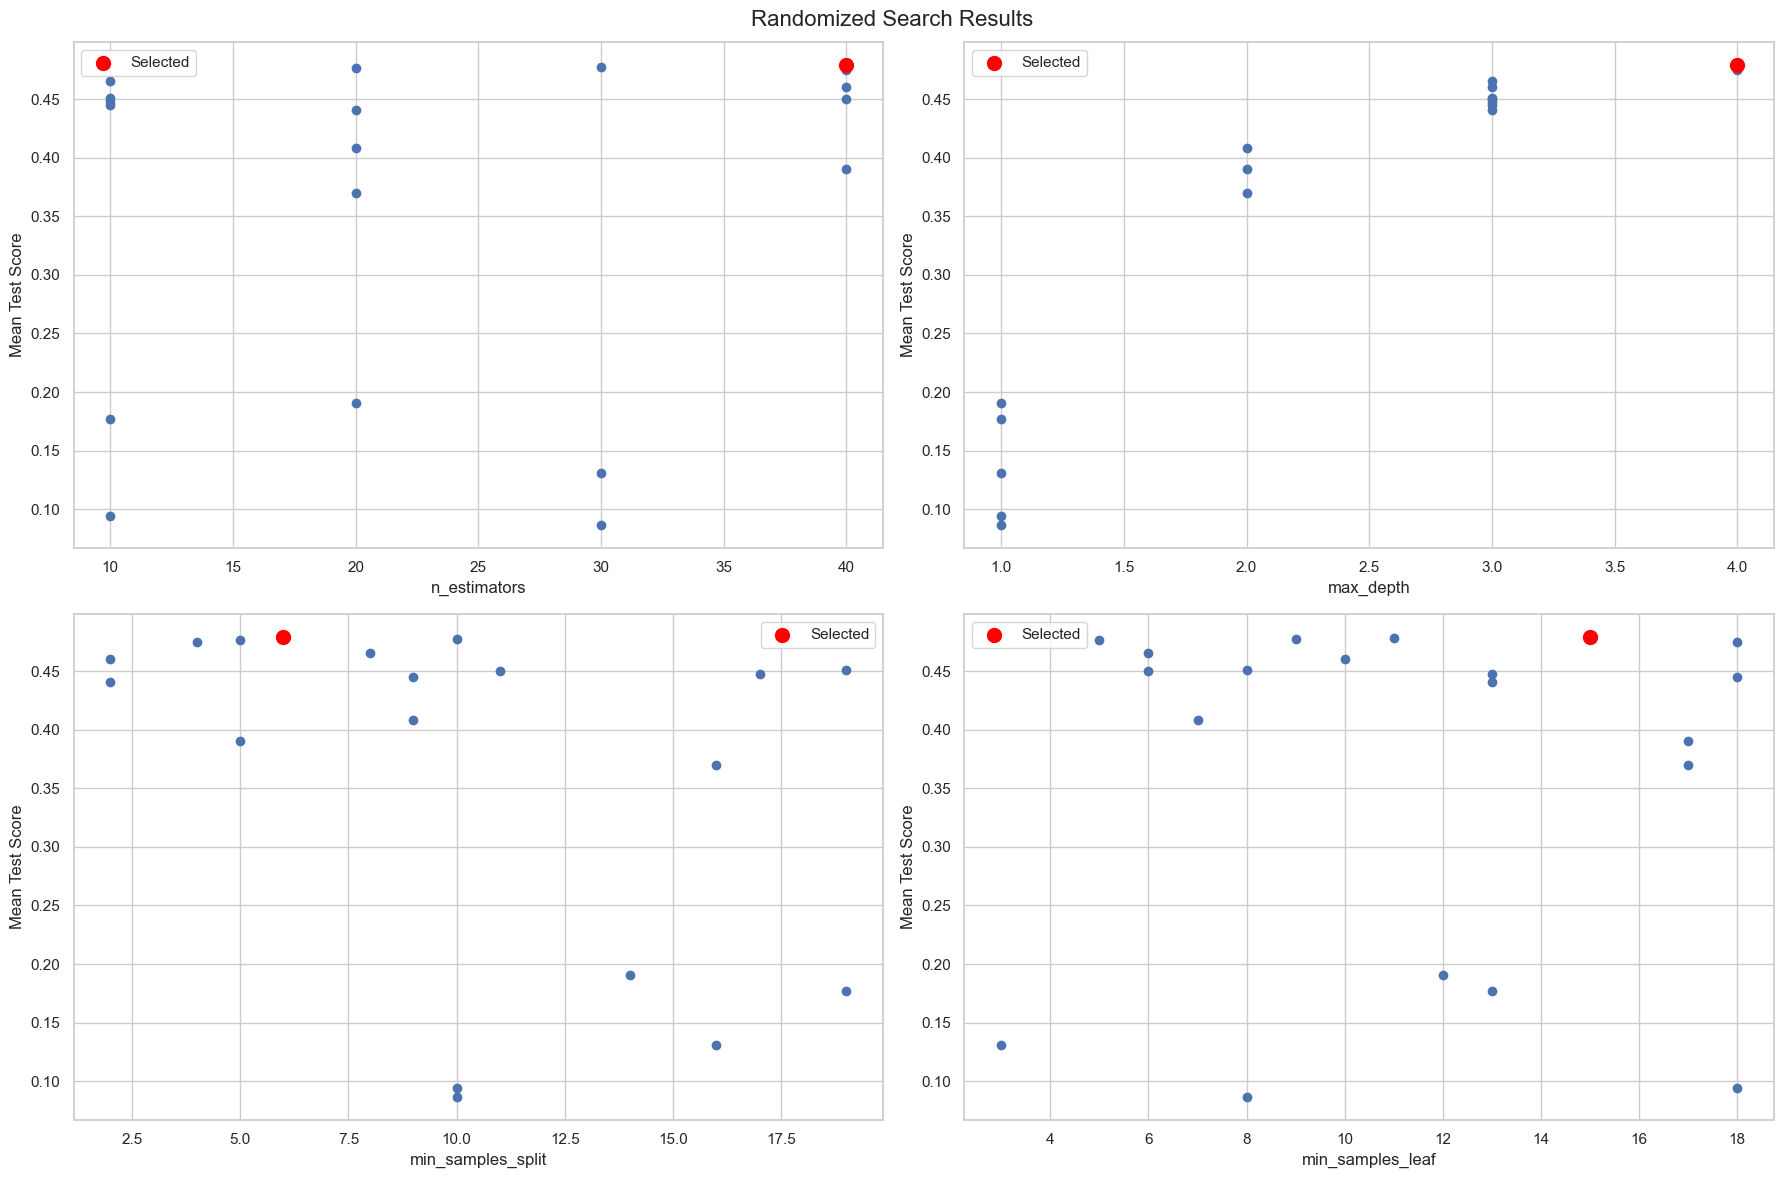

In [61]:
# Get the parameter values and scores
param_names = list(hyperparameters.keys())
param_ranges = list(hyperparameters.values())
scores = random_search.cv_results_['mean_test_score']

# Create subplots for each hyperparameter
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Plot the results for each hyperparameter
for i, ax in enumerate(axes):
    param_name = param_names[i]
    param_values = random_search.cv_results_['param_' + param_name]
    best_param = random_search.best_params_[param_name]

    ax.scatter(param_values, scores)
    ax.scatter(best_param, random_search.best_score_, color='red', label='Selected', s=100)
    ax.set_xlabel(param_name)
    ax.set_ylabel('Mean Test Score')
    ax.grid(True)
    ax.legend()

plt.suptitle('Randomized Search Results', fontsize=16)
plt.tight_layout()
plt.show()

In [62]:
# Now we can train the random forest with the selected hyper paramters on the whole training dataset
rf_classifier = RandomForestClassifier(**random_search.best_params_,random_state=45)

#Fit the model to whole trainset
rf_classifier.fit(X = tree_transformed_X_train,
                  y = y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=6,
                       n_estimators=40, random_state=45)

#### Random Forest Feature Importances

In [63]:
# Get the feature importances from the trained model
importances = rf_classifier.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

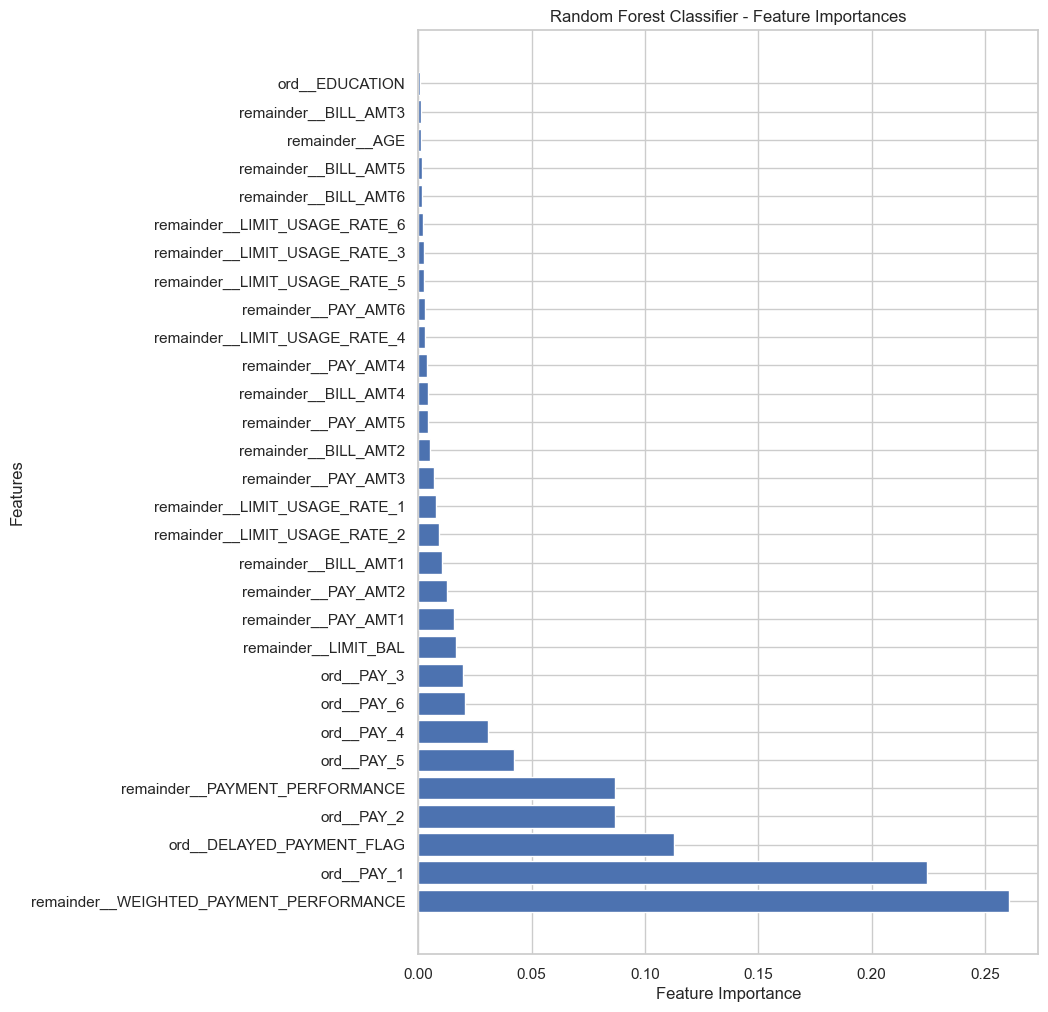

In [64]:
# Create a horizontal bar plot of feature importances
plt.figure(figsize=(8, 12))
plt.barh(range(len(feature_names)), sorted_importances, align='center')
plt.yticks(range(len(feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Feature Importances')
plt.grid(True)

plt.show()

Like decision tree, random forest importances are mostly in similar order for highly imported features. Just like decision tree, the feature that I create (WEIGHTED_PAYMENT_PERFORMANCE) is the most important feature in our random forest model. 

One of the main differences from the decision tree importances is that random forest algorithm is used nearly all of the features in our dataset. It is an expected behaviors of the random forest to utilize more features than the decision tree, since it creates multiple trees (n_estimator times trees) and each of these trees can benefit from different feature.

In [65]:
# Training Results
train_preds = rf_classifier.predict(tree_transformed_X_train)
train_f1_score = f1_score(y_train,train_preds)

In [66]:
# Test the results in test set
test_preds = rf_classifier.predict(tree_transformed_X_test)
test_f1_score = f1_score(y_test,test_preds)

In [67]:
# The results of Random Forest
print('The average F1 Score of Random Forest with best hyper-parameters is: {:.3f}'
      .format(random_search.best_score_))

print('The F1 score in our train set is :',round(train_f1_score,3))
print('The F1 score in our test set is :',round(test_f1_score,3))

The average F1 Score of Random Forest with best hyper-parameters is: 0.479
The F1 score in our train set is : 0.482
The F1 score in our test set is : 0.469


In [68]:
# Although we are mainly concerning with the F1 score, 
#it is always advised to check the other metrics as well
print('Classification Report for Random Forest on Train Data')
print(classification_report(y_train,train_preds))
print('**********************************************************')
print('Classification Report for Random Forest on Test Data')
print(classification_report(y_test,test_preds))

Classification Report for Random Forest on Train Data
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18691
           1       0.69      0.37      0.48      5309

    accuracy                           0.82     24000
   macro avg       0.77      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000

**********************************************************
Classification Report for Random Forest on Test Data
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## Results
- Discuss the results here. You can discuss the results with respect to algorithms'/models' performance as well as you can give some reason why that algorithm/model performed better than the others. 
- Any further results can be discussed here.

When we compare the results of our logistic regression, decision tree and random forest algorithms on validation datasets based on the classification metric that we choose (which is F1 score), the results are as follows:
<br>
<br>

|Rank| Model|Train F1|Validation F1|Test F1|
|----|------|--------|---------|----------|
|1| Random Forest|0.482 | 0.481|0.468
|2| Decision Tree|0.479 | 0.476|0.471
|3| Logistic Regression|0.457 | 0.460|0.451

<br>

Overall, the Random Forest model outperformed the Decision Tree and Logistic Regression models in terms of F1 score. However, it's important to consider other factors such as interpretability, computational efficiency, and the specific requirements of the problem when selecting the most suitable algorithm for a given task. For this case, I am not concerned with the interpretability of my model and computational efficiencies are fairly close. **Based on these results, I choose random forest as my final model.**

This results are not suprising because random forest is the most complex model out of these 3 algorithms (which is also considered black-box model).

The worst performing one was logistic regression. In general logistic regression models can not capture the non-linear relationships in the dataset. Therefore, its performance is worse compared to the tree based algorithms which can understand both linear and non-linear relationships.

However, one of the suprising results is that, although our random forest performed best in validation dataset. On test set the best performing model was decision tree. This will not affect our model selection because it is important to remember that we shouldn't make decision based on the test set.

In general, I was expecting to random forest perform significantly better than the other models. It performed slightly better than the other models in validation set and even lose to the decision tree on test set. This slight performance issue might be caused by the selected small hyper-parameter space in hyper-parameter tuning phase in order to speed up the process. One of the first improvements might be running the random forest algorithm with a larger hyper-parameter space and more number of iterations in random search.



## Conclusion
- Give a summary of your project and make a conclusion.

In this study, I used credit card default dataset from UCI Machine Learning Repository. The dataset used in this project contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

The problem that I tackle was one of the classical risk management cases which is predicting the default probability of a customer on the next months credit card payment. I used the given customer informations.

The steps that I applied;

First I try to **explore** the dataset especially based on my target variable. I try to show the effect of each independent variable on my dependent variable and show these effects on plots or cross tables for better understanding. 

For some similar columns like payment information of customer in different months, I checked the correlation of these features with each other in order to see and eliminate the highly correlated features for my feature works.

After the exploration step, I started **data cleaning**. 
Basically, I change; 
* some of the feature names,
* some of the values in categorical features that are not mentioned in metadata and can not be interpreted,
* negative bill amounts are didn't make any sense to me so I change them to 0.

Also in cleaning step, I dropped some of columns like 'gender' and 'marriage status' because of ethical concerns.

Next step was **feature engineering** and **creating new features**. Based on my business knowledge from my working background, I created several features that can be effective on predicting my target variable. One of them was weighted_payment_performance which I try to aggregate all payment history in single feature with the increasing weights with recency. As we have seen in decision tree and random forest feature importances, this feature was by far the most effective feature in these algorithms.

I choose my classification metric as F1 score and stated the reasons why I think it is the most suited metric for this case.

As my last step, I train 3 different algorithms which are **logistic regression**, **decision tree** and **random forest**.

In **logistic regression** I created a column transformation pipeline to scale my numeric columns and ordinal encoder to encode my ordinal categorical columns. After that, I selected my final numeric columns based on the variation inflation factor (VIF score<5). Although I prepared a code for backward feature elimination, I didn't include it in this notebook, since it run pretty slow because of the number of features that I had (30 features after feature engineering). With the ordinal features and numeric features selected by VIF, I performed logistic regression and store the results.

In **decision tree**, I only encode ordinal columns and didn't apply any other preprocessing method, since tree based algorithms can run without them. I created a 5 fold random search hyper-parameter tuning and selected the best hyper-parameters for my case. Than I plotted the hyper-parameters tried in random search and their performances. Then with the best parameters I trained my whole training set and store the results of decision tree model.

Lastly I trained **random forest** algorithm. Very similar steps are applied with decision tree with different hyper parameter space and number of iterations in random search. 

At the end of the notebook I compare all of my model results and commented about their performances and the reasoning behind their performance issues. Also I try to give future improvement steps that I can apply to improve the results.


## References

- All the external sources (including images, data set access etc should be cited here).

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

dataset = https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

https://scikit-learn.org/stable/user_guide.html

## Additional Folders

If this document involves datasets and images, please keep them in datasets and img folders, respectively. Please, be sure that your project is REPRODUCIBLE. Otherwise, it may not be graded.